In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
for x,y in enumerate(df.columns.values.tolist()):
  print(df[y].unique())
print(df.nunique())

[ 8949 29725 11561 ... 24576  5756 23834]
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77'

In [ ]:
df[['last_new_job','last_new_job']].unique()

AttributeError: ignored

In [ ]:
df.columns.values.tolist()

In [ ]:
df.shape

In [ ]:
df2 = df.dropna()
df2.shape


In [ ]:
df['last_new_job'].unique()

In [ ]:
df3= df.dropna(axis=0, subset=['gender'])

In [ ]:
df3.isnull().sum()

In [ ]:
df3.groupby('enrolled_university').agg({'enrolled_university':'count'})

In [ ]:
df3['enrolled_university'].unique()

In [ ]:
df3['enrolled_university'].isnull().sum()

## Analyzing Gender


In [ ]:
df_gender = df[['gender']]
print(df_gender.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  14650 non-null  object
dtypes: object(1)
memory usage: 149.8+ KB
None


In [ ]:
df_gender.isnull().sum()

gender    4508
dtype: int64

gender has 4.5k null values

## Analyzing CDI

In [ ]:
df_cdi = df[['city_development_index']]

In [ ]:
df_cdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
dtypes: float64(1)
memory usage: 149.8 KB


In [ ]:
df_cdi.isnull().sum()

city_development_index    0
dtype: int64

CDI has no null values

## Missing Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

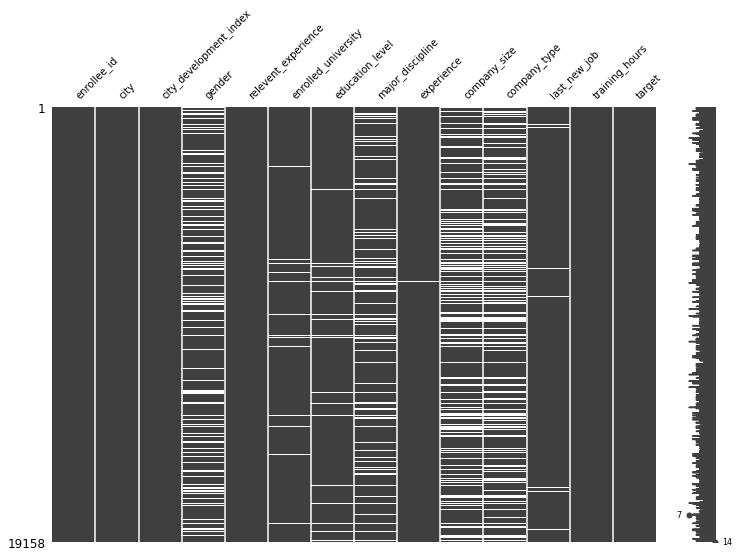

In [ ]:
msno.matrix(df, figsize = (12, 8), fontsize =10);

## Filling Gender Null and Viz

In [ ]:
df['gender'] = df['gender'].fillna('DNM')

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    # a calculates the height of each count value of each bar  
    a = [p.get_height() for p in plot.patches]
    
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
def plotsa1(category):

  for cat in category:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=cat, hue='target', data=df)
    plt.title(cat + ' vs Target')
    ######################
    with_hue(ax, df[cat], df[cat].nunique(), df.target.nunique())

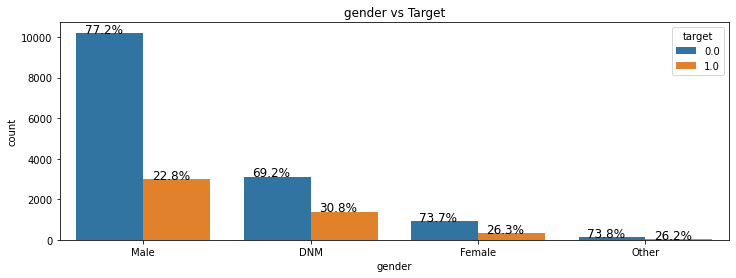

In [ ]:
plotsa1(['gender'])

22 percent of males look for a change, as compared to 26 percent of females.

### Viz for CDI

In [ ]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).


In [ ]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df['cdi_bucket'] = pd.cut(df['city_development_index'], bins = cdi_bins, labels = cdi_labels)

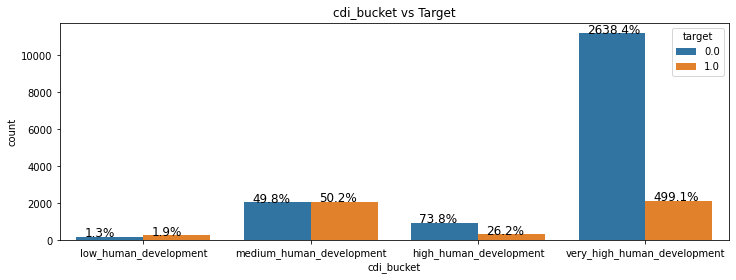

In [ ]:
plotsa1(['cdi_bucket'])

Candidates from cities with lower and medium development index are more likely to look for a change, however this can be biased since we dont have a lot of data for this.

In [ ]:
df['cdi_bucket'].nunique()

2